In [1]:
import pandas as pd
import numpy as np 
from tabulate import tabulate
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import metrics
from wordcloud import WordCloud
import nltk
import re
import string
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn import metrics
nltk.download('vader_lexicon')
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report
from sklearn.decomposition import LatentDirichletAllocation

import numpy as np
import pandas as pd
import seaborn as sn
import seaborn as sns
from sklearn.model_selection import train_test_split 
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from tqdm import tqdm
import neattext.functions as nfx
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Embedding,Dense,LSTM,Bidirectional,GlobalMaxPooling1D,Input,Dropout
import pickle
from sklearn.preprocessing import LabelEncoder
import keras
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
import tensorflow as tf
from sklearn.metrics import classification_report, accuracy_score

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/prashantkarna/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# import pandas as pd
# data = pd.read_csv('/Users/prashantkarna/Documents/Research Materials/Datasets/Suicide_Detection.csv')

# data['class'] = data['class'].replace(['suicide'], 1)
# data['class'] = data['class'].replace(['non-suicide'], 0)


In [2]:
import pandas as pd
data = pd.read_csv('/Users/prashantkarna/Documents/Research Materials/Datasets/depression_dataset_reddit_cleaned.csv')
# rename the columns
data = data.rename(columns={'clean_text': 'text', 'is_depression': 'class'})

In [3]:
# import pandas as pd
# data2 = pd.read_csv('/Users/prashantkarna/Documents/Research Materials/Datasets/depression_dataset_reddit_cleaned.csv')
# # rename the columns
# data2 = data2.rename(columns={'clean_text': 'text', 'is_depression': 'class'})

In [4]:
# data = pd.concat([data1,data2])
# data.shape

In [5]:
# print(data.columns)

In [6]:
# import numpy as np
# data_split = np.array_split(Suicide, 3)
# Suicide = data_split[0]
# data = data.drop('Unnamed: 0', axis=1)


In [3]:
data.shape

(7731, 2)

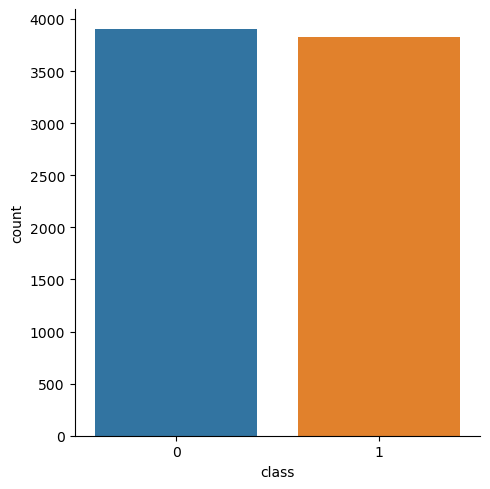

In [4]:
sns.catplot(x="class", kind="count",  data= data)
# plt.savefig('type.png')

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,232074.0,174152.863518,100500.425362,2.0,87049.25,174358.5,261285.75,348110.0
class,232074.0,0.500000,0.500001,0.0,0.00,0.5,1.00,1.0


In [10]:
data.isnull().sum()

Unnamed: 0    0
text          0
class         0
dtype: int64

In [11]:
data_corr = data.corr()
data_corr

,Unnamed: 0,class
Unnamed: 0,1.000000,0.000739
class,0.000739,1.000000


In [12]:
# plt.figure(figsize = [36, 27])

# sns.heatmap(data.corr(), cmap = 'RdYlGn', annot = True, vmax = 0.7, vmin = -0.7);
# plt.title('Pair-wise correlation coefficients across attributes');

# # plt.savefig('cor_all.png')

In [8]:
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/prashantkarna/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
X = data.drop('class', axis=1)
y = data['class']


In [15]:
y_arr = pd.Series(y)

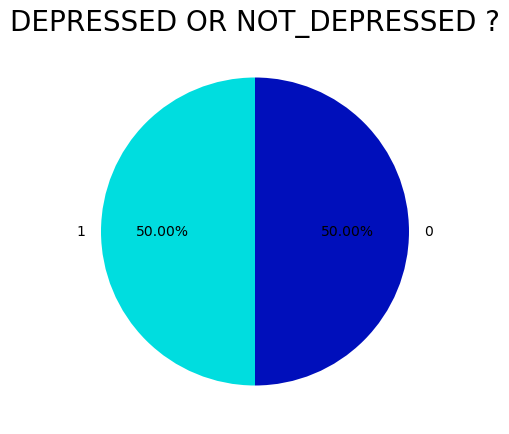

In [16]:
plt.figure(figsize=(10,5))
plt.pie(y_arr.value_counts(),startangle=90,colors=['#00dddf','#000fbb'],
       autopct='%0.2f%%',labels=['1','0'])
plt.title('DEPRESSED OR NOT_DEPRESSED ?',fontdict={'size':20})
plt.show()


In [9]:
# To remove emails
email_regex = r'([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)'
regexes_to_remove = [email_regex, r'Subject:', r'Re:']

for i in range(0, len(X)):
    # removing all special charachter
    review = re.sub('[^a-zA-Z]', ' ', str(X['text'][i]))
    # make document as lowerCase
    review = review.lower()
    # splitting the documents into words for ex ['iam', 'omar']
    review = review.split()
    # make lemmatization --> (change, changing, changes)---> (change)
    review = [lemmatizer.lemmatize(word) for word in review if not word in set(stopwords)]
    # join the document agian
    review = ' '.join(review)
    
    # removing mails
    for r in regexes_to_remove:
        X['text'][i] = re.sub(r, '', review)


In [18]:
# tokenizer=Tokenizer()
# tokenizer.fit_on_texts(X['text'])

In [19]:
# word_freq=pd.DataFrame(tokenizer.word_counts.items(),columns=['word','count']).sort_values(by='count',ascending=False)

In [20]:
# plt.figure(figsize=(10,10))
# sns.barplot(x='count',y='word',data=word_freq.iloc[:50])
# plt.show()

In [21]:
# feature_names=word_freq['word'].values
# wc=WordCloud(max_words=400)
# wc.generate(' '.join(word for word in feature_names[500:3500] ))
# plt.figure(figsize=(10,15))
# plt.axis('off')
# plt.imshow(wc)

In [22]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [10]:
tfidf_vectorizer_uni = TfidfVectorizer(max_features=10000,ngram_range=(1,1))
tfidf_vectorizer_bi = TfidfVectorizer(max_features=10000, ngram_range=(1,2))
tfidf_vectorizer_tri = TfidfVectorizer(max_features=10000, ngram_range=(1,3))


X_tfidf_uni = tfidf_vectorizer_uni.fit_transform(X['text'])
# X_tfidf_test_uni = tfidf_vectorizer_uni.transform(X_test['text'])

X_tfidf_bi = tfidf_vectorizer_bi.fit_transform(X['text'])
# X_tfidf_test_bi =tfidf_vectorizer_bi.transform(X_test['text'])

X_tfidf_tri = tfidf_vectorizer_tri.fit_transform(X['text'])
# X_tfidf_test_tri = tfidf_vectorizer_tri.transform(X_test['text'])

In [24]:
# tfidf_vectorizer = TfidfVectorizer(max_features=10000)
# tfidf_vectorizer_n12 = TfidfVectorizer(max_features=10000, ngram_range=(1,2))


# X_tfidf_train = tfidf_vectorizer.fit_transform(X_train['text'])
# X_tfidf_test = tfidf_vectorizer.transform(X_test['text'])

# X_tfidf_train_n12= tfidf_vectorizer_n12.fit_transform(X_train['text'])
# X_tfidf_test_n12=tfidf_vectorizer_n12.transform(X_test['text'])

In [25]:
# vectorizer = CountVectorizer()
  
# X_bow_train = vectorizer.fit_transform(X_train['text'])
# X_bow_test = vectorizer.transform(X_test['text'])

In [26]:
# from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
# def get_vader_scores(data):
#     sid=SIA()
#     vader_df=data.copy()
#     vader_df['scores'] = vader_df['text'].apply(lambda txt: sid.polarity_scores(str(txt)))
    
#     vader_df['neg_score'] = vader_df['scores'].apply(lambda txt: txt['neg'])
#     vader_df['neu_score'] =vader_df['scores'].apply(lambda txt: txt['neu'])
#     vader_df['pos_score'] = vader_df['scores'].apply(lambda txt: txt['pos'])
#     vader_df['compound'] = vader_df['scores'].apply(lambda txt: txt['compound'])
#     vader_df.drop('scores', axis=1, inplace=True)
#     vader_df.drop('text', axis=1, inplace=True)
#     return vader_df

In [27]:
# X_vader_train = get_vader_scores(X_train)
# X_vader_test= get_vader_scores(X_test)

In [28]:
# from sklearn.svm import LinearSVC
# from sklearn.feature_selection import SelectFromModel

# # We Can select any model but linearSVC has l1 norm penality which deals with sparse
# lsvc = LinearSVC(C=100, penalty='l1', max_iter=500, dual=False)
# lsvc.fit(X_tfidf_train, y_train)

# # This function select the best features that has high weigh
# fs = SelectFromModel(lsvc, prefit=True)
# # This function redeuce X to the selected features
# X_selection = fs.transform(X_tfidf_train)
# X_test_selection = fs.transform(X_tfidf_test)


# lsvc.fit(X_tfidf_train_n12, y_train)
# fs_n12 = SelectFromModel(lsvc, prefit=True)
# X_selection_n12 = fs_n12.transform(X_tfidf_train_n12)
# X_test_selection_n12 = fs_n12.transform(X_tfidf_test_n12)

# lsvc.fit(X_bow_train, y_train)
# fs_n12 = SelectFromModel(lsvc, prefit=True)
# X_selection_bow = fs_n12.transform(X_bow_train)
# X_test_selection_bow = fs_n12.transform(X_bow_test)

In [29]:
# lsvc = LinearSVC(C=1000, penalty='l1', max_iter=500, dual=False)
# lsvc.fit(X_selection, y_train)
# y_predict_tfidf = lsvc.predict(X_test_selection)

# lsvc.fit(X_selection_n12,y_train)
# y_predict_tfidf_n12 = lsvc.predict(X_test_selection_n12)

# lsvc.fit(X_selection_bow,y_train)
# y_predict_bow = lsvc.predict(X_test_selection_bow)

# lsvc.fit(X_vader_train,y_train)
# y_predict_vader = lsvc.predict(X_vader_test)

# linear_svm_tfidf_results=metrics.precision_recall_fscore_support(y_test, y_predict_tfidf)
# linear_svm_tfidf_n12_results=metrics.precision_recall_fscore_support(y_test, y_predict_tfidf_n12)
# linear_svm_bow_results=metrics.precision_recall_fscore_support(y_test, y_predict_bow)
# vader_svm_results=metrics.precision_recall_fscore_support(y_test, y_predict_vader)

In [30]:
# tfidf_acc= metrics.accuracy_score(y_test, y_predict_tfidf)
# tfidf_n12_acc=accuracy_score(y_test, y_predict_tfidf_n12)
# bow_acc= accuracy_score(y_test, y_predict_bow)
# vader_acc=accuracy_score(y_test, y_predict_vader)

In [31]:
# data1 = [['TF-IDF','TF-IDF 2-grams ','bag of words','vader'],
#          ['precision',linear_svm_tfidf_results[0][0],linear_svm_tfidf_n12_results[0][0],linear_svm_bow_results[0][0],
#           vader_svm_results[0][0]],
#          ['recall',linear_svm_tfidf_results[1][0],linear_svm_tfidf_n12_results[1][0],linear_svm_bow_results[1][0],
#           vader_svm_results[1][0]],
#          ['F1-score',linear_svm_tfidf_results[2][0],linear_svm_tfidf_n12_results[2][0],linear_svm_bow_results[2][0],
#           vader_svm_results[2][0]],
#         ['accuracy',tfidf_acc,tfidf_n12_acc,bow_acc,
#           vader_acc]]

In [32]:
# print(tabulate(data1,headers='firstrow',tablefmt='fancy_grid'))

In [11]:
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# Set up Stratified KFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define classifiers
svm = LinearSVC()
lr = LogisticRegression()
nb = MultinomialNB(alpha=0.01)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
xgb = XGBClassifier(random_state=42)

# Define lists to store accuracy scores
svm_acc = []
lr_acc = []
nb_acc = []
rf_acc=[]
xgb_acc=[]

# Perform stratified k-fold cross-validation on selected features
for train_index, test_index in skf.split(X_tfidf_bi , y):
    # Split data into training and testing sets
    X_train, X_test = X_tfidf_bi [train_index], X_tfidf_bi [test_index]
    y_train, y_test = y[train_index], y[test_index]
    
 # Fit and predict using LinearSVC
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_acc.append(accuracy_score(y_test, svm_pred))
print("LinearSVC classification report:\n", classification_report(y_test, svm_pred))
    
 # Fit and predict using Logistic Regression
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_acc.append(accuracy_score(y_test, lr_pred))
print("Logistic Regression classification report:\n", classification_report(y_test, lr_pred))
    
# Fit and predict using Naive Bayes
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
nb_acc.append(accuracy_score(y_test, nb_pred))
print("Naive Bayes classification report:\n", classification_report(y_test, nb_pred))

# Fit and predict using Random Forest Classifier
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# Calculate accuracy and print classification report
rf_acc = accuracy_score(y_test, rf_pred)

print("Random Forest Classification Report:\n", classification_report(y_test, rf_pred))

# Fit and predict using XGBoost Classifier
xgb.fit(X_train, y_train, eval_metric='error')
xgb_pred = xgb.predict(X_test)
xgb_acc.append(accuracy_score(y_test, xgb_pred))

# Print classification report
print("XGBoost Classifier bi classification report:\n", classification_report(y_test, xgb_pred))



# Print best accuracy score for each classifier
print("LinearSVC best accuracy:", np.mean(svm_acc))
print("Logistic Regression best accuracy:", np.mean(lr_acc))
print("Naive Bayes best accuracy:", np.mean(nb_acc))
print("Random Forest Accuracy:", np.mean(rf_acc))
print("XGBoost best accuracy:", np.mean(xgb_acc))



LinearSVC classification report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       780
           1       0.98      0.96      0.97       766

    accuracy                           0.97      1546
   macro avg       0.97      0.97      0.97      1546
weighted avg       0.97      0.97      0.97      1546

Logistic Regression classification report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       780
           1       0.98      0.94      0.96       766

    accuracy                           0.96      1546
   macro avg       0.96      0.96      0.96      1546
weighted avg       0.96      0.96      0.96      1546

Naive Bayes classification report:
               precision    recall  f1-score   support

           0       0.98      0.76      0.86       780
           1       0.80      0.98      0.88       766

    accuracy                           0.87      1546
   macro avg  

In [12]:
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# # Set up Stratified KFold
# skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define classifiers
svm = LinearSVC()
lr = LogisticRegression()
nb = MultinomialNB()
rf = RandomForestClassifier(n_estimators=100, random_state=42)
xgb = XGBClassifier(random_state=42)

# Define lists to store accuracy scores
svm_acc = []
lr_acc = []
nb_acc = []
rf_acc = []
xgb_acc = []

# Perform stratified k-fold cross-validation on selected features
for train_index, test_index in skf.split(X_tfidf_tri , y):
    # Split data into training and testing sets
    X_train, X_test = X_tfidf_tri [train_index], X_tfidf_tri [test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit and predict using LinearSVC
    svm.fit(X_train, y_train)
    svm_pred = svm.predict(X_test)
    svm_acc.append(accuracy_score(y_test, svm_pred))
    print("LinearSVC classification report:\n", classification_report(y_test, svm_pred))
    
    # Fit and predict using Logistic Regression
    lr.fit(X_train, y_train)
    lr_pred = lr.predict(X_test)
    lr_acc.append(accuracy_score(y_test, lr_pred))
    print("Logistic Regression classification report:\n", classification_report(y_test, lr_pred))
    
    # Fit and predict using Naive Bayes
    nb.fit(X_train, y_train)
    nb_pred = nb.predict(X_test)
    nb_acc.append(accuracy_score(y_test, nb_pred))
    print("Naive Bayes classification report:\n", classification_report(y_test, nb_pred))

    # Fit and predict using Random Forest Classifier
    rf.fit(X_train, y_train)
    rf_pred = rf.predict(X_test)

    # Calculate accuracy and print classification report
    rf_acc = accuracy_score(y_test, rf_pred)
   
    print("Random Forest Classification Report:\n", classification_report(y_test, rf_pred))

    # Fit and predict using XGBoost Classifier
    xgb.fit(X_train, y_train, eval_metric='error')
    xgb_pred = xgb.predict(X_test)
    xgb_acc.append(accuracy_score(y_test, xgb_pred))

    # Print classification report
    print("XGBoost Classifier classification report:\n", classification_report(y_test, xgb_pred))




# Print best accuracy score for each classifier
print("LinearSVC best accuracy:", np.mean(svm_acc))
print("Logistic Regression best accuracy:", np.mean(lr_acc))
print("Naive Bayes best accuracy:", np.mean(nb_acc))
print("Random Forest Accuracy:", np.mean(rf_acc))
print("XGBoost Classifier best accuracy:", np.mean(xgb_acc))



LinearSVC classification report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95       780
           1       0.98      0.92      0.95       767

    accuracy                           0.95      1547
   macro avg       0.95      0.95      0.95      1547
weighted avg       0.95      0.95      0.95      1547

Logistic Regression classification report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.96       780
           1       0.98      0.92      0.95       767

    accuracy                           0.95      1547
   macro avg       0.96      0.95      0.95      1547
weighted avg       0.96      0.95      0.95      1547

Naive Bayes classification report:
               precision    recall  f1-score   support

           0       0.97      0.86      0.91       780
           1       0.87      0.97      0.92       767

    accuracy                           0.91      1547
   macro avg  

In [15]:
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# # Set up Stratified KFold
# skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define classifiers
svm = LinearSVC()
lr = LogisticRegression()
nb = MultinomialNB()
rf = RandomForestClassifier(n_estimators=100, random_state=42)
xgb = XGBClassifier(random_state=42)

# Define lists to store accuracy scores
svm_acc = []
lr_acc = []
nb_acc = []
rf_acc = []
xgb_acc=[]

# Perform stratified k-fold cross-validation on selected features
for train_index, test_index in skf.split(X_tfidf_uni , y):
    # Split data into training and testing sets
    X_train, X_test = X_tfidf_uni [train_index], X_tfidf_uni [test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit and predict using LinearSVC
    svm.fit(X_train, y_train)
    svm_pred = svm.predict(X_test)
    svm_acc.append(accuracy_score(y_test, svm_pred))
    print("LinearSVC classification report:\n", classification_report(y_test, svm_pred))
    
    # Fit and predict using Logistic Regression
    lr.fit(X_train, y_train)
    lr_pred = lr.predict(X_test)
    lr_acc.append(accuracy_score(y_test, lr_pred))
    print("Logistic Regression classification report:\n", classification_report(y_test, lr_pred))
    
    # Fit and predict using Naive Bayes
    nb.fit(X_train, y_train)
    nb_pred = nb.predict(X_test)
    nb_acc.append(accuracy_score(y_test, nb_pred))
    print("Naive Bayes classification report:\n", classification_report(y_test, nb_pred))



    # Fit and predict using Random Forest Classifier
    rf.fit(X_train, y_train)
    rf_pred = rf.predict(X_test)
    rf_acc.append(accuracy_score(y_test, rf_pred))      
    # Print classification report
    print("Random Forest classification report:\n", classification_report(y_test, rf_pred))

    # Fit and predict using XGBoost Classifier
    xgb.fit(X_train, y_train, eval_metric='error')
    xgb_pred = xgb.predict(X_test)
    xgb_acc.append(accuracy_score(y_test, xgb_pred))

    # Print classification report
    print("XGBoost Classifier classification report:\n", classification_report(y_test, xgb_pred))





# Print best accuracy score for each classifier
print("LinearSVC best accuracy:", np.mean(svm_acc))
print("Logistic Regression best accuracy:", np.mean(lr_acc))
print("Naive Bayes best accuracy:", np.mean(nb_acc))
print("Random Forest Accuracy:", np.mean(rf_acc))
print("XGBoost Classifier best accuracy:", np.mean(xgb_acc))


LinearSVC classification report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       780
           1       0.97      0.92      0.95       767

    accuracy                           0.95      1547
   macro avg       0.95      0.95      0.95      1547
weighted avg       0.95      0.95      0.95      1547

Logistic Regression classification report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95       780
           1       0.98      0.91      0.94       767

    accuracy                           0.95      1547
   macro avg       0.95      0.95      0.95      1547
weighted avg       0.95      0.95      0.95      1547

Naive Bayes classification report:
               precision    recall  f1-score   support

           0       0.97      0.80      0.88       780
           1       0.82      0.98      0.89       767

    accuracy                           0.89      1547
   macro avg  

In [ ]:
# import matplotlib.pyplot as plt
# from sklearn.metrics import roc_curve, auc

# # Create a figure to plot the ROC curves
# fig, ax = plt.subplots(figsize=(8, 8))
# X_train, X_test, y_train, y_test = train_test_split(X_tfidf_uni, y, test_size=0.2, random_state=42)
# # Define the classifiers
# classifiers = {'LinearSVC': svm, 'Logistic Regression': lr, 'Naive Bayes': nb, 'Random Forest': rf,'XGBClassifier':xgb}

# # Loop through each classifier and plot its ROC curve
# for name, clf in classifiers.items():
#     # Fit the classifier and predict the probabilities of the positive class
#     clf.fit(X_train, y_train)
#     if hasattr(clf, 'decision_function'):
#         y_score = clf.decision_function(X_test)
#     else:
#         y_score = clf.predict_proba(X_test)[:, 1]
    
#     # Compute the ROC curve and its AUC
#     fpr, tpr, thresholds = roc_curve(y_test, y_score)
#     roc_auc = auc(fpr, tpr)
    
#     # Plot the ROC curve and its AUC
#     ax.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# # Plot the random classifier curve
# ax.plot([0, 1], [0, 1], linestyle='--', color='grey')

# # Set the labels and legend
# ax.set_xlabel('False Positive Rate')
# ax.set_ylabel('True Positive Rate')
# ax.set_title('ROC curves')
# ax.legend()
# plt.show()


In [ ]:
# import matplotlib.pyplot as plt
# from sklearn.metrics import roc_curve, auc

# # Create a figure to plot the ROC curves
# fig, ax = plt.subplots(figsize=(8, 8))
# X_train, X_test, y_train, y_test = train_test_split(X_tfidf_bi, y, test_size=0.2, random_state=42)
# # Define the classifiers
# classifiers = {'LinearSVC': svm, 'Logistic Regression': lr, 'Naive Bayes': nb, 'Random Forest': rf,'XGBClassifier':xgb}

# # Loop through each classifier and plot its ROC curve
# for name, clf in classifiers.items():
#     # Fit the classifier and predict the probabilities of the positive class
#     clf.fit(X_train, y_train)
#     if hasattr(clf, 'decision_function'):
#         y_score = clf.decision_function(X_test)
#     else:
#         y_score = clf.predict_proba(X_test)[:, 1]
    
#     # Compute the ROC curve and its AUC
#     fpr, tpr, thresholds = roc_curve(y_test, y_score)
#     roc_auc = auc(fpr, tpr)
    
#     # Plot the ROC curve and its AUC
#     ax.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# # Plot the random classifier curve
# ax.plot([0, 1], [0, 1], linestyle='--', color='grey')

# # Set the labels and legend
# ax.set_xlabel('False Positive Rate')
# ax.set_ylabel('True Positive Rate')
# ax.set_title('ROC curves')
# ax.legend()
# plt.show()


In [ ]:
# import matplotlib.pyplot as plt
# from sklearn.metrics import roc_curve, auc

# # Create a figure to plot the ROC curves
# fig, ax = plt.subplots(figsize=(8, 8))
# X_train, X_test, y_train, y_test = train_test_split(X_tfidf_tri, y, test_size=0.2, random_state=42)
# # Define the classifiers
# classifiers = {'LinearSVC': svm, 'Logistic Regression': lr, 'Naive Bayes': nb, 'Random Forest': rf,'XGBClassifier':xgb}

# # Loop through each classifier and plot its ROC curve
# for name, clf in classifiers.items():
#     # Fit the classifier and predict the probabilities of the positive class
#     clf.fit(X_train, y_train)
#     if hasattr(clf, 'decision_function'):
#         y_score = clf.decision_function(X_test)
#     else:
#         y_score = clf.predict_proba(X_test)[:, 1]
    
#     # Compute the ROC curve and its AUC
#     fpr, tpr, thresholds = roc_curve(y_test, y_score)
#     roc_auc = auc(fpr, tpr)
    
#     # Plot the ROC curve and its AUC
#     ax.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# # Plot the random classifier curve
# ax.plot([0, 1], [0, 1], linestyle='--', color='grey')

# # Set the labels and legend
# ax.set_xlabel('False Positive Rate')
# ax.set_ylabel('True Positive Rate')
# ax.set_title('ROC curves')
# ax.legend()
# plt.show()
